<center> <img src="https://media.springernature.com/lw685/springer-static/image/chp%3A10.1007%2F978-3-030-39364-9_5/MediaObjects/489541_1_En_5_Fig3_HTML.png" width=50% > </center>

<br><br>

<center> 
    <font size="6">Lab 2: Neighborhood Processing, Low-level Filters & Applications in image processing</font> 
</center>
<center> 
    <font size="4">Computer Vision 1 University of Amsterdam</font> 
</center>
<center> 
    <font size="4">Due 23:59, September 20, 2024 (Amsterdam time)</font> 
</center>
<center> 
    <font size="4"><b>TA's: Ronny, Owen, Oliver</b></font>
</center>

<br><br>

***

<br><br>

<center>

Student1 ID:  \
Student1 Name: 

Student2 ID: \
Student2 Name: 

Student3 ID: \
Student3 Name: 

( Student4 ID: \
Student4 Name: )

</center>

### **Import Libraries**

In [1]:
import sys

if sys.version_info[0] < 3:
    raise Exception("Python 3 or a more recent version is required.")

In [2]:
# environment and libraries
import os
import math
import numpy as np
import time
import cv2
import matplotlib
import matplotlib.pyplot as plt
import sklearn
import scipy.signal
import pandas as pd
from tqdm import tqdm

from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [3]:
# Make sure you're using the provided environment!
assert cv2.__version__ == "4.10.0", "You're not using the provided Python environment!"
assert np.__version__ == "1.26.4", "You're not using the provided Python environment!"
assert matplotlib.__version__ == "3.9.2", "You're not using the provided Python environment!"
# Proceed to the next cell if you don't get any error.

### **Instructions**

Your code and discussion must be handed in this jupyter notebook, renamed to **StudentID1_StudentID2_StudentID3.ipynb** before the deadline by submitting it to the Canvas Lab 2 Assignment. Please also fill out your names and ID's above.

For full credit, make sure your notebook follows these guidelines:
- It is mandatory to **use the Python environment provided** with the assignment; the environment specifies the package versions that have to be used to prevent the use of particular functions. Using different packages versions may lead to grade deduction. In the Python cell above you can check whether your environment is set up correctly.
- To install the environment with the right package versions, use the following command in your terminal: ```conda env create --file=CV1_environment.yaml```, then activate the environment using the command ```conda activate cv1```.
- Do not use additional packages or materials that have not been provided or explicitly mentioned.
- Please express your thoughts **concisely**. The number of words does not necessarily correlate with how well you understand the concepts.
- Answer all given questions and sub-questions.
- Try to understand the problem as much as you can. When answering a question, give evidences (qualitative and/or quantitative results, references to papers, figures etc.) to support your arguments. Note that not everything might be explicitly asked for and you are expected to think about what might strengthen you arguments and make the notebook self-contained and complete.
- Tables and figures must be accompanied by a **brief** description. Do not forget to add a number, a title, and if applicable name and unit of variables in a table, name and unit of axes and legends in a figure.

__Note:__ A more complete overview of the lab requirements can be found in the Course Manual on Canvas

Late submissions are not allowed. Assignments that are submitted after the strict deadline will not be graded. In case of submission conflicts, TAs’ system clock is taken as reference. We strongly recommend submitting well in advance, to avoid last minute system failure issues.

Plagiarism note: Keep in mind that plagiarism (submitted materials which are not your work) is a serious crime and any misconduct shall be punished with the university regulations. This includes the use of generative tools such as ChatGPT.

**ENSURE THAT YOU SAVE ALL RESULTS / ANSWERS ON THE QUESTIONS (EVEN IF YOU RE-USE SOME CODE).**

### **Overview**

- [Section 1: Neighborhood Processing for Image Processing (3 points)](#section-1)
  - [Question 1 (2 points)](#question-1)
  - [Question 2 (1 points)](#question-2)
- [Section 2: Low-Level Gaussian Filters (11 points)](#section-2)
  - [Question 3 (2 points)](#question-3)
  - [Question 4 (3 points)](#question-4)
  - [Question 5 (1 point)](#question-5)
  - [Question 6 (2 points)](#question-6)
  - [Question 7 (1 point)](#question-7)
  - [Question 8 (2 points)](#question-8)
- [Section 3: Low-Level Gabors Filters (15 points)](#section-3)
  - [Question 9 (6 points)](#question-9)
  - [Question 10 (1 point)](#question-10)
  - [Question 11 (1 point)](#question-11)
  - [Question 12 (1 point)](#question-12)
  - [Question 13 (6 points)](#question-13)
- [Section 4: Noise in digital images (27 points)](#section-4)
  - [Question 14 (2 points)](#question-14)
  - [Question 15 (4 points)](#question-15)
  - [Question 16 (1 point)](#question-16)
  - [Question 17 (1 point)](#question-17)
  - [Question 18 (3 points)](#question-18)
  - [Question 19 (2 points)](#question-19)
  - [Question 20 (2 points)](#question-20)
  - [Question 21 (3 points)](#question-21)
  - [Question 22 (2 points)](#question-22)
  - [Question 23 (2 points)](#question-23)
  - [Question 24 (3 points)](#question-24)
  - [Question 25 (2 points)](#question-24)
- [Section 5: Edge Detection (20 points)](#section-5)
  - [Question 26 (4 points)](#question-26)
  - [Question 27 (3 points)](#question-27)
  - [Question 28 (4 point)](#question-28)
  - [Question 29 (1 points)](#question-29)
  - [Question 30 (2 points)](#question-30)
  - [Question 31 (2 points)](#question-31)
  - [Question 32 (2 points)](#question-32)
  - [Question 33 (2 points)](#question-33)
- [Section 6: Foreground-background separation (24 points)](#section-6)
  - [Question 33 (8 points)](#question-33)
  - [Question 34 (8 points)](#question-34)
  - [Question 35 (4 points)](#question-35)
  - [Question 36 (4 points)](#question-36)
- [Section X: Individual Contribution Report (Mandatory)](#section-x)

<a id="section-1"></a>
### **Section 1: Neighborhood Processing for Image Processing**

This assignment will start with an exploration of neighborhood processing techniques, which are fundamental to image processing. These techniques allow for the extraction of structural patterns such as edges and blobs, and are extensively used in tasks like image denoising and segmentation. Neighborhood or block processing is also a key component of Convolutional Neural Networks.

Neighborhood processing involves examining the pixels surrounding a point $I(x, y)$ in an image $I$ and applying a function, $h(k, l)$, that measures specific properties or relationships within that local window. This function, $h(k, l)$, is known as the neighborhood operator or local operator, and is often implemented as a linear filter.

Linear filters compute a weighted sum of the neighboring pixel intensities and assign this sum to the pixel of interest, producing the output $I_{out}(i, j)$. These filters are typically represented as square matrices. Terms like filters, kernels, weight matrices, or masks are often used interchangeably in the literature. A kernel is a matrix that defines a neighborhood operation, such as edge detection or smoothing.

Linear filters are applied across the entire image using operators like correlation ($\otimes$) and convolution ($\ast$).\

Both operators are *linear shift-invariant* (LSI), meaning they function consistently across the image. The discrete forms of these operators are expressed as follows:

- **Correlation (1)**:

$\mathbf{I}_{out} = I \otimes  \mathbf{h} \\
\mathbf{I}_{out}(i,j) = \sum_{k,l}  \mathbf{I}(i+k,j+l) \mathbf{h}(k,l)$

- **Convolution (2)**:

$\mathbf{I}_{out} = \mathbf{I} \ast  \mathbf{h} \\
\mathbf{I}_{out}(i,j) = \sum_{k,l} \mathbf{I}(i-k,j-l) \mathbf{h}(k,l)$

The following example illustrates neighborhood processing: a kernel or mask convolves over the input image, with each pixel intensity multiplied by the corresponding weight in the kernel. The example uses a $3x3$ averaging mask, showing the effect of filtering on the input image.

<div>
<img src="https://assets.8thlight.com/images/insights/posts/2022-03-25-what-is-a-convolution/padding_example.png" width="700"/>
</div>

<a id="question-1"></a>
#### <font color='#FF0000'>Question 1 (2 points)</font>

What is the difference between correlation and convolution operators? How do they treat the signals $\mathbf{I}$ and $\mathbf{h}$?

##### <font color='yellow'>Answer:</font>

>Correlation is basically the opposite of convolution (a correlation is a convolution with a transpose). They treat the I and h the same, just the end result for an individual path is inverse.

<a id="question-2"></a>
#### <font color='#FF0000'>Question 2 (1 point)</font>

Correlation and convolution operators are equivalent when we make an assumption on the form of the mask $\mathbf{h}$. Can you identify the case? Give precise answer here.

##### <font color='yellow'>Answer:</font>

>When h has odd size and is symmetric.

<a id="section-2"></a>
### **Section 2: Low-Level Gaussian Filters**

In this section, you will design common linear filters used in neighborhood processing. We will focus in on Gaussian filters, which are widely used for image smoothing and noise reduction.

<a id="question-3"></a>
#### <font color='#FF0000'>Question 3 (2 points)</font>

The 1D Gaussian filter is defined as follows:

$G_{\sigma}(x)=\frac{1}{\sigma\sqrt{2\pi}}\text{ exp}(-\frac{x^2}{2\sigma^2})$

where $\sigma$ is the standard deviation of the Gaussian. However, such a formulation creates an infinitely large convolution kernel. In practice, the kernel is truncated with a `kernel_size` parameter such that $-\left\lfloor \frac{kernel\_size}{2}\right\rfloor \leq x \leq \left\lfloor \frac{kernel\_size}{2} \right\rfloor$, where $\left\lfloor \cdot \right\rfloor$ is the floor operator. For example, if `kernel_size` equals 3, then $x \in \{ -1, 0, 1 \}$.

Now, implement the following function `gaussian_kernel_1D`.

**Hint:** Do not forget to normalize your filter.

**Note:** You are not allowed to use any Python built-in functions provided by *SciPy* or other libraries to compute the kernel.

In [4]:
def gaussian_kernel_1D(sigma, kernel_size):
    '''
    Computes a 1D Gaussian kernel.

    Args:
        sigma: Standard deviation of the Gaussian distribution.
        kernel_size: The size of the kernel, must be an odd positive integer.

    Returns:
        kernel: A 1D numpy array representing the Gaussian kernel, normalized so that the sum of all elements equals 1.
    '''

    kernel = np.zeros((1, kernel_size))

    if kernel_size % 2 == 0:
        raise ValueError("The kernel size must be an odd number. Otherwise, the kernel will not have a center to convolve around.")

    # YOUR CODE HERE
    half_kernel = kernel_size // 2
    for x in range(-half_kernel, half_kernel + 1): 
        kernel[0, x + half_kernel] = 1 / (sigma * np.sqrt(2 * np.pi)) * np.exp(- x ** 2 / (2 * sigma ** 2))
        
    kernel /= kernel.sum()

    return kernel

In [5]:
G = gaussian_kernel_1D(2, 5)
print(G)

[[0.15246914 0.2218413  0.25137912 0.2218413  0.15246914]]


<a id="question-4"></a>
#### <font color='#FF0000'>Question 4 (3 points)</font>

One of the most important properties of 2D Gaussian kernels is separability. This means that convolving an image with a 2D Gaussian kernel is equivalent to convolving the image twice with a 1D Gaussian filter: once along the x-axis and once along the y-axis, **separately**. A 2D Gaussian kernel can then be defined as the product of two 1D Gaussian kernels:

$G_{\sigma}(x, y) = G_{\sigma}(x) \times G_{\sigma}(y)$ *(Equation A)*

This is mathematically equivalent to:

$G_{\sigma}(x, y) = \frac{1}{\sigma^2 2\pi}\text{ exp}(-\frac{x^2 + y^2}{2\sigma^2})$ *(Equation B)*

Implement the `gaussian_kernel_2D` function that corresponds to *Equation A*. You should make use of the previously implemented `gaussian_kernel_1D` function.

**Note:** You are not allowed to use any Python built-in functions provided by *SciPy* or other libraries to compute the kernel.

In [6]:
def gaussian_kernel_2D(sigma_x, sigma_y, kernel_size):
    '''
    Computes a 2D Gaussian kernel using the separability property.

    Args:
        sigma_x: Standard deviation of the Gaussian distribution along the x-axis.
        sigma_y: Standard deviation of the Gaussian distribution along the y-axis.
        kernel_size: The size of the kernel, must be an odd positive integer.

    Returns:
        kernel_2d: A 2D numpy array representing the Gaussian kernel, normalized so that the sum of all elements equals 1.
    '''

    # YOUR CODE HERE
    gaussian_kernel_x = gaussian_kernel_1D(sigma_x, kernel_size)
    gaussian_kernel_y = gaussian_kernel_1D(sigma_y, kernel_size)
    
    kernel_2d = gaussian_kernel_x.T @ gaussian_kernel_y

    return kernel_2d

In [7]:
G = gaussian_kernel_2D(2, 2, 3)
print(G)

[[0.10186806 0.11543164 0.10186806]
 [0.11543164 0.13080118 0.11543164]
 [0.10186806 0.11543164 0.10186806]]


<a id="question-5"></a>
#### <font color='#FF0000'>Question 5 (1 point)</font>

Consider the following two scenarios:

1. An image is convolved with a 2D Gaussian kernel.
2. The same image is convolved first with a 1D Gaussian kernel along the x-axis and then with a 1D Gaussian kernel along the y-axis.

Will these two scenarios produce the same result? Explain your answer.

##### <font color='yellow'>Answer:</font>

>The 2 scenarios will produce the same result because normal distribution is linerly separable.

<a id="question-6"></a>
#### <font color='#FF0000'>Question 6 (2 points)</font>

What is the computational complexity for both scenarios described in Question 5? Provide your answer in Big O notation, using *n* for the width of the image, *m* for the height of the image, and *k* for the size of the kernel.

##### <font color='yellow'>Answer:</font>

The complexity is O(n * m * k^2)

<a id="question-7"></a>
#### <font color='#FF0000'>Question 7 (1 point)</font>

So far, the Gaussian kernels that we have computed are primarily used for image enhancement tasks, such as denoising. However, these kernels can also be used to detect changes in image intensity, which are crucial for identifying low-level features. These features can then serve as building blocks for more complex tasks like object detection or segmentation.

The first-order derivative of the 1D Gaussian kernel is given by:

$\frac{d}{dx}G_\sigma(x)  =\frac{d}{dx}\left( \frac{1}{\sigma\sqrt{2\pi}}\exp\left(-\frac{x^2}{2\sigma^2}\right) \right)$

$ = -\frac{x}{\sigma^3\sqrt{2\pi}}\exp\left(-\frac{x^2}{2\sigma^2}\right)$ *(Eq. C)*

$ = -\frac{x}{\sigma^2}G_\sigma(x)$

Similarly, the first-order derivative of the 2D Gaussian kernel can be obtained by computing $\frac{d}{dx}G_\sigma(x,y)$ and $\frac{d}{dy}G_\sigma(x,y)$.

Determine the first-order derivative of the 2D Gaussian kernel by computing $\frac{d}{dx}G_\sigma(x,y)$ and $\frac{d}{dy}G_\sigma(x,y)$.

Show your calculations, as done above for $\frac{d}{dx}G_\sigma(x)$.

Remember that:

$G_{\sigma}(x, y) =\frac{1}{\sigma^2 2\pi}\exp\left(-\frac{x^2 + y^2}{2\sigma^2}\right)$

##### <font color='yellow'>Answer:</font>

>*Write your answer here.*

<a id="question-8"></a>
#### <font color='#FF0000'>Question 8 (2 points)</font>

The second-order derivative of the Gaussian kernel can also be computed. Why is it useful to design a second-order kernel? Provide one example where it is more beneficial to use a second-order derivative Gaussian kernel compared to a first-order derivative Gaussian kernel, and explain how it can be used.

##### <font color='yellow'>Answer:</font>

>*Write your answer here.*

<a id="section-3"></a>
### **Section 3: Low-Level Gabors Filters**

In this section, we will explore Gabor filters, which are widely used in image processing for edge detection, texture analysis, and feature extraction. Gabor filters are based on the Gabor wavelet, which is a sinusoidal wave modulated by a Gaussian function.

Gabor filters fall into the category of linear filters and are widely used for *texture analysis*. The reason why they are a good choice for texture analysis is that they localize well in the frequency spectrum (*optimally* bandlimited) and therefore work as flexible *band-pass* filters.

In the following image you can see even (cosine-modulated) and odd parts (sine-modulated) of Gabor filters with fixed-σ Gaussian. You can observe time-domain filters for the modulating sinusoidals of central frequencies, 10, 20, 30, 40 and 50 Hz, respectively.

<img src="https://drive.google.com/thumbnail?id=1wv6ZUOfiHMDgg0jW7n5lqkaFiFztjnEo&sz=w800">

Gabor filters with varying center frequencies are sensitive to different frequency bands. Notice that the neighboring (in the frequency spectrum) filters minimally interfere with each other.

<img src="https://drive.google.com/thumbnail?id=1hUQaKE_TwC-9_jMIao1CCxyjembMrUab&sz=w800">

<a id="question-9"></a>
#### <font color='#FF0000'>Question 9 (6 points)</font>

To understand Gabor functions, let's start with 1D signals (e.g., speech) and then generalize to the 2D case, which is more relevant for images. A Gabor function is essentially a Gaussian function modulated by a complex sinusoidal carrier signal. This can be expressed as:

$g(t) = x(t) \cdot m(t)$ *(Equation C)*

where $x(t) = \frac{1}{\sqrt{2\pi}\sigma} e^{-\frac{t^2}{2\sigma^2}}$ is the Gaussian function, and $m(t) = e^{j 2 \pi f_c t} = e^{j w_c t}$ is the complex sinusoidal carrier. Here, $\sigma$ controls the spread of the Gaussian, and $w_c$ is the central frequency of the carrier signal.

Using Euler's formula:

$e^{j w t} = \cos(w t) + j \sin(w t)$

we can rewrite the Gabor function as:

$g(t) = \frac{1}{\sqrt{2\pi}\sigma} e^{-\frac{t^2}{2\sigma^2}} \left[\cos(w_c t) + j \sin(w_c t)\right]$

This can be further broken down into:

$g(t) = g_e(t) + j g_o(t)$

where $g_e(t)$ and $g_o(t)$ are the even and odd parts of the function, arranged orthogonally on the complex plane. In practice, you can use either the even or odd part for filtering purposes, or the entire complex form.

In 2D, the concept extends with a sine wave described by two orthogonal spatial frequencies $u_0$ and $v_0$:

$s(x,y) = \sin(2\pi(u_0 x + v_0 y))$

and a 2D Gaussian:

$C \cdot \exp\left(-\left(\frac{(x-x_0)^2}{2\sigma_x^2} + \frac{(y-y_0)^2}{2\sigma_y^2}\right)\right)$

The 2D Gabor function then takes the following forms:

$g_{\text{real}}(x,y; \lambda, \theta, \psi, \sigma, \gamma) = \exp\left(-\frac{x^{\prime2}+\gamma^2 y^{\prime2}}{2\sigma^2}\right) \cos\left( 2\pi \frac{x^{\prime}}{\lambda} + \psi  \right)$

$g_{\text{im}}(x,y; \lambda, \theta, \psi, \sigma, \gamma) = \exp\left(-\frac{x^{\prime2}+\gamma^2 y^{\prime2}}{2\sigma^2}\right) \sin\left( 2\pi \frac{x^{\prime}}{\lambda} + \psi  \right)$

where:

$x^\prime = x\cos\theta + y\sin\theta$

$y^\prime = -x\sin\theta + y\cos\theta$

Here, $\lambda$, $\theta$, $\psi$, $\sigma$, and $\gamma$ are parameters that control the shape and size of the Gabor function.

In this question, you will design a Gabor filter bank, which is a collection of Gabor filters with different orientations and scales. To achieve this, you will have to implement the `create_gabor()` function. Before that, complete the following helper functions:

- `generate_rotation_matrix()`
- `create_cos()`
- `create_sin()`
- `create_gauss()`

Finally, use these helper functions within the `create_gabor()` function to construct the Gabor filters.

In [20]:
def generate_rotation_matrix(theta):
    '''
    Returns the rotation matrix for a given theta.
    
    Args:
        theta: Rotation parameter in radians.
    
    Returns:
        rot_matrix: Rotation matrix.
    '''

    # YOUR CODE HERE
    rot_matrix = np.array([[np.cos(theta), -np.sin(theta)], [np.sin(theta), np.cos(theta)]])

    return rot_matrix

In [21]:
def create_cos(rot_x, lamda, psi):
    '''
    Returns the 2D cosine carrier.
    
    Args:
        rot_x: Rotated x-coordinates.
        lamda: Wavelength of the cosine function.
        psi: Phase offset.
    
    Returns:
        cos_carrier: 2D cosine carrier.
    '''

    # YOUR CODE HERE
    cos_carrier = np.cos(2 * np.pi * rot_x / lamda + psi)    

    return cos_carrier

In [22]:
def create_sin(rot_x, lamda, psi):
    '''
    Returns the 2D sine carrier.
    
    Args:
        rot_x: Rotated x-coordinates.
        lamda: Wavelength of the sine function.
        psi: Phase offset.
    
    Returns:
        sin_carrier: 2D sine carrier.
    '''

    # YOUR CODE HERE
    sin_carrier = np.sin(2 * np.pi * rot_x / lamda + psi)

    return sin_carrier

In [23]:
def create_gauss(rot_x, rot_y, gamma, sigma):
    '''
    Returns the 2D Gaussian envelope.
    
    Args:
        rot_x: Rotated x-coordinates.
        rot_y: Rotated y-coordinates.
        gamma: Aspect ratio of the Gaussian envelope.
        sigma: Standard deviation of the Gaussian.
    
    Returns:
        gauss_env: 2D Gaussian envelope.
    '''

    # YOUR CODE HERE
    gauss_env = np.exp(- (rot_x + gamma ** 2 * rot_y ** 2) / (2 * sigma ** 2))
    
    return gauss_env

To implement the `create_gabor` function, you need to follow several mathematical steps that involve generating the coordinate grid, rotating the coordinates, computing the Gaussian envelope, and creating the sinusoidal carriers.

First, set the aspect ratios by computing the standard deviations along the x and y axes: $\sigma_x = \sigma$ and $\sigma_y = \frac{\sigma}{\gamma}$. This ensures that the Gaussian envelope has the correct aspect ratio controlled by $\gamma$.

Next, generate the coordinate grid to cover significant values of the Gaussian function, typically set to cover $n_{\text{stds}} = 3$ standard deviations. The maximum extents along the x and y axes are calculated as $x_{\text{max}} = \max\left(\left|n_{\text{stds}} \sigma_x \cos\theta\right|, \left|n_{\text{stds}} \sigma_y \sin\theta\right|\right)$ and $y_{\text{max}} = \max\left(\left|n_{\text{stds}} \sigma_x \sin\theta\right|, \left|n_{\text{stds}} \sigma_y \cos\theta\right|\right)$. Ensure that the grid size is at least 1 by taking the ceiling of the maximum values: $x_{\text{max}} = \lceil\max(1, x_{\text{max}})\rceil$ and $y_{\text{max}} = \lceil\max(1, y_{\text{max}})\rceil$.

To create a square filter, set $x_{\text{max}} = y_{\text{max}} = \max(x_{\text{max}}, y_{\text{max}})$ and define the grid ranges as $x_{\text{min}} = -x_{\text{max}}$ and $y_{\text{min}} = -y_{\text{max}}$.

Then, generate the coordinate system by creating a meshgrid of x and y coordinates: $(x, y) = \text{meshgrid}(x_{\text{min}}:x_{\text{max}}, \, y_{\text{min}}:y_{\text{max}})$.

Flatten the coordinate matrices and stack them into a 2-by-N matrix: $xy = \begin{bmatrix} x_{\text{flattened}} \\ y_{\text{flattened}} \end{bmatrix}$, where $N$ is the total number of points in the grid.

Rotate the coordinates by constructing the rotation matrix $R$, using `generate_rotation_matrix` and applying it to the coordinates: $\begin{bmatrix} x' \\ y' \end{bmatrix} = R \times xy$.

Compute the Gaussian envelope using `create_gauss`, which creates a Gaussian envelopere and shapes it back to the grid shape.

Create the sinusoidal carriers by computing the cosine and sine components using `create_cos` and `create_sin`.

Modulate the Gaussian envelope with the sinusoidal carriers to obtain the real and imaginary parts of the Gabor filter.

Finally, pack the results by combining the real and imaginary parts into a single 3D array: $\text{Gabor Filter}[:,:,0] = \text{Gabor Real}$ and $\text{Gabor Filter}[:,:,1] = \text{Gabor Imaginary}$. The final Gabor filter will have the shape $[h, w, 2]$, where $h$ and $w$ are the height and width of the grid.



In [48]:
def create_gabor(sigma, theta, lambda_, psi, gamma):
    '''
    Creates a complex-valued Gabor filter.
    
    Args:
        sigma: Standard deviation of the Gaussian envelope.
        theta: Orientation of the Gaussian envelope in the range [0, pi/2).
        lambda_: Wavelength of the carrier signal.
        psi: Phase offset for the carrier signal.
        gamma: Aspect ratio of the Gaussian envelope.
    
    Returns:
        my_gabor: A 3D array of shape [h, w, 2], where the first channel contains the real part and the second channel contains the imaginary part of the Gabor filter.
    '''

    # Set the aspect ratio.
    # YOUR CODE HERE
    sigma_x = sigma
    sigma_y = sigma / gamma
    
    # Generate a grid
    # YOUR CODE HERE
    n_stds = 3
    x_max = max(np.abs(n_stds * sigma_x * np.cos(theta)), np.abs(n_stds * sigma_y * np.sin(theta)))
    x_max = np.ceil(max(1.0, x_max))
    
    y_max = max(np.abs(n_stds * sigma_x * np.sin(theta)), np.abs(n_stds * sigma_y * np.cos(theta)))
    y_max = np.ceil(max(1.0, y_max))

    # Make sure that we get square filters.
    # YOUR CODE HERE
    x_max = y_max = max(x_max, y_max)
    x_min = -x_max
    y_min = -y_max

    # Generate a coordinate system in the range [xmin, xmax] and [ymin, ymax].
    # YOUR CODE HERE
    x_range = np.arange(x_min, x_max + 1)
    y_range = np.arange(y_min, y_max + 1)
    x, y = np.meshgrid(x_range, y_range)

    # Convert to a 2-by-N matrix where N is the number of pixels in the kernel.
    # YOUR CODE HERE
    xy = np.array([x.flatten(), y.flatten()])

    # Compute the rotation of pixels by theta.
    # YOUR CODE HERE
    R = generate_rotation_matrix(theta)
    xy_rotated = R @ xy
    x_rotated = xy_rotated[0, :].reshape(x.shape)
    y_rotated = xy_rotated[1, :].reshape(y.shape)

    # Create the Gaussian envelope.
    # YOUR CODE HERE
    gauss = create_gauss(x_rotated, y_rotated, gamma, sigma)

    # Create the orthogonal carrier signals.
    # YOUR CODE HERE
    cos_carrier = create_cos(x_rotated, lambda_, psi)
    sin_carrier = create_sin(x_rotated, lambda_, psi)

    # Modulate (multiply) Gaussian envelope with the carriers to compute
    # the real and imaginary components of the complex Gabor filter.
    # YOUR CODE HERE
    g_real = gauss * cos_carrier
    g_imag = gauss * sin_carrier

    # Pack my_gabor_real and my_gabor_imaginary into my_gabor.
    # YOUR CODE HERE
    my_gabor = np.zeros((g_real.shape[0], g_real.shape[1], 2)) 
    my_gabor[:, :, 0] = g_real  
    my_gabor[:, :, 1] = g_imag 

    return my_gabor

<a id="question-10"></a>
#### <font color='#FF0000'>Question 10 (1 point)</font>

Visualize how the parameter $\theta$ affects the Gabor filter in the spatial domain. Use the following steps:

1. Initialize the parameters as follows: $\lambda = 30$, $\theta = 0$, $\psi = 0$, $\sigma = 10$, $\gamma = 0.25$.
2. Set $\theta$ to $0$, $\pi/4$, and $\pi/2$ while keeping the other parameters unchanged.
3. Generate and display the Gabor filters corresponding to each value of $\theta$.
4. Ensure that each image in the visualization is clearly labeled to indicate the value of $\theta$ it represents.

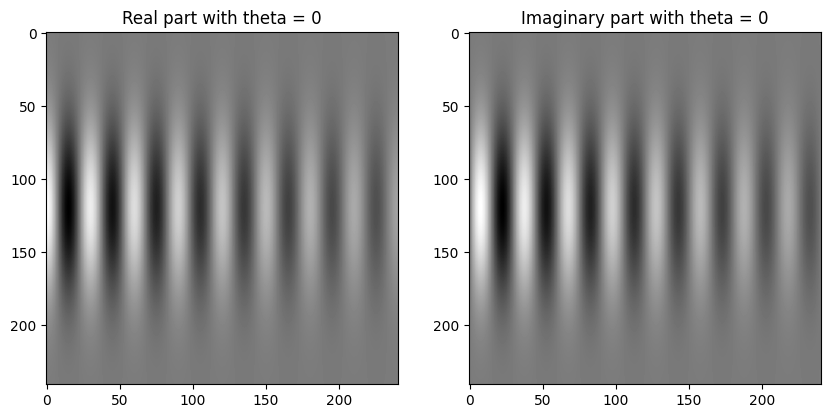

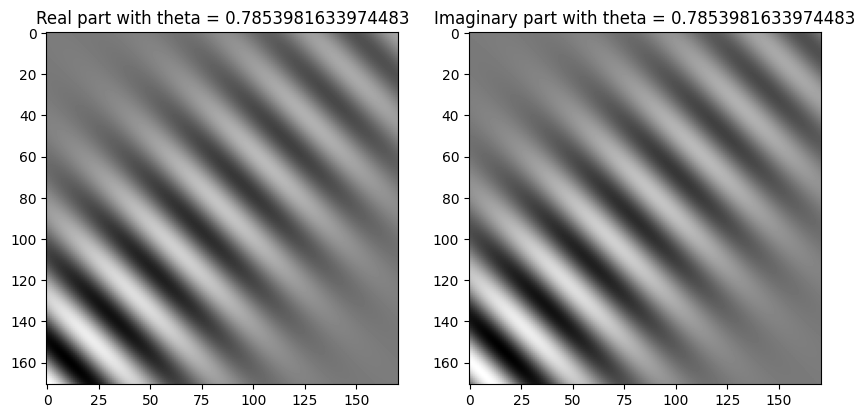

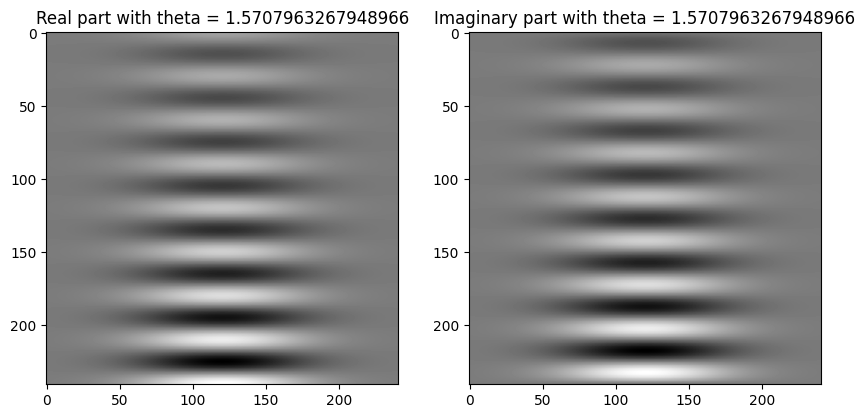

In [49]:
# YOUR CODE HERE
lambda_ = 30
thetas = [0, np.pi / 4, np.pi / 2]
psi = 0
sigma = 10
gamma = 0.25

for theta in thetas: 
    gabor_filter = create_gabor(sigma, theta, lambda_, psi, gamma)
    real = gabor_filter[:, :, 0]
    imaginary = gabor_filter[:, :, 1]

    fig, ax = plt.subplots(1, 2, figsize=(10, 5))

    # Plot the real part
    ax[0].title.set_text('Real part with theta = ' + str(theta))
    ax[0].imshow(real, cmap='gray')
    
    # Plot the imaginary part
    ax[1].title.set_text('Imaginary part with theta = ' + str(theta))
    ax[1].imshow(imaginary, cmap='gray')
    
    plt.show()

<a id="question-11"></a>
#### <font color='#FF0000'>Question 11 (1 point)</font>

Visualize how the parameter $\sigma$ affects the Gabor filter in the spatial domain. Use the following steps:

1. Initialize the parameters as follows: $\lambda = 35$, $\theta = \pi/6$, $\psi = \pi/4$, $\sigma = 10$, $\gamma = 0.5$.
2. Set $\sigma$ to $10$, $30$, and $45$ while keeping the other parameters unchanged.
3. Generate and display the Gabor filters corresponding to each value of $\sigma$.
4. Ensure that each image in the visualization is clearly labeled to indicate the value of $\sigma$ it represents.

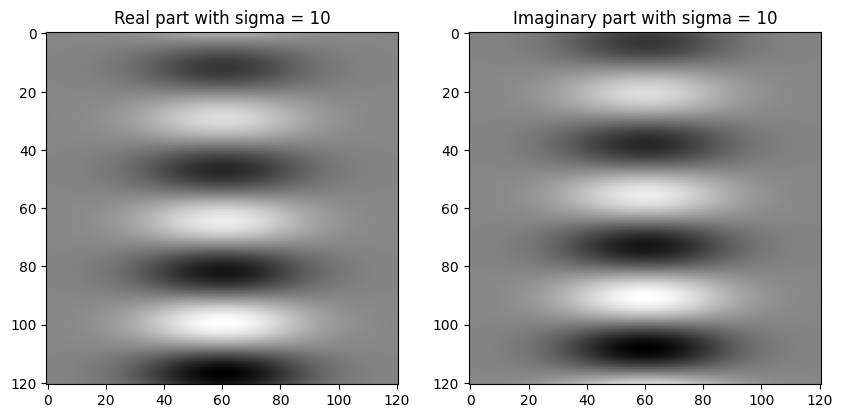

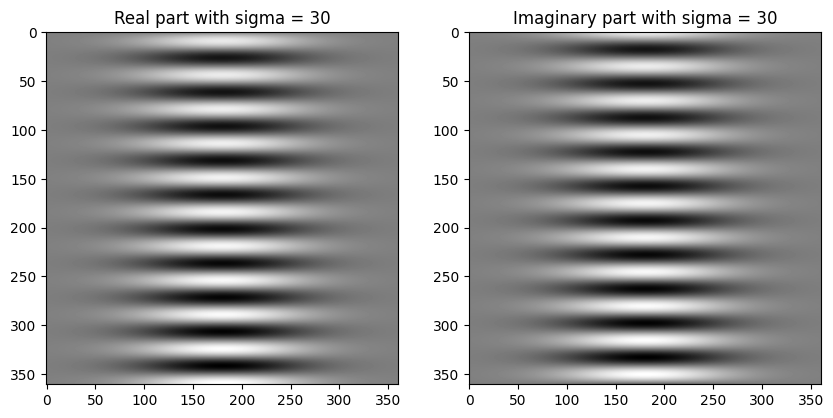

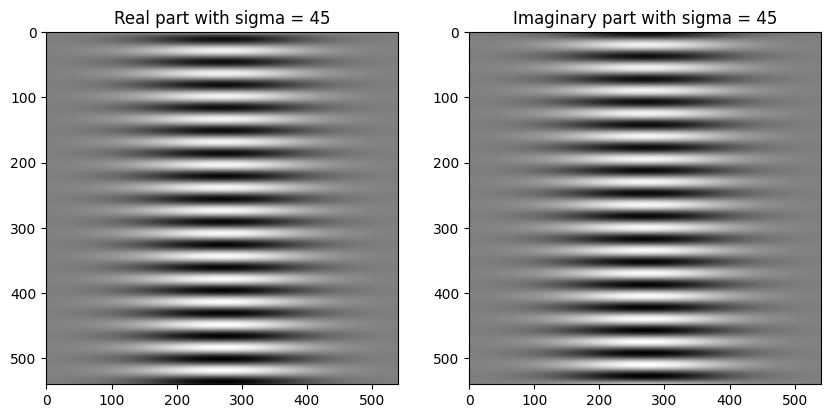

In [51]:
# YOUR CODE HERE
lambda_ = 35
thetas = np.pi / 6
psi = np.pi / 4
sigmas = [10, 30, 45]
gamma = 0.5

for sigma in sigmas: 
    gabor_filter = create_gabor(sigma, theta, lambda_, psi, gamma)
    real = gabor_filter[:, :, 0]
    imaginary = gabor_filter[:, :, 1]

    fig, ax = plt.subplots(1, 2, figsize=(10, 5))

    # Plot the real part
    ax[0].title.set_text('Real part with sigma = ' + str(sigma))
    ax[0].imshow(real, cmap='gray')
    
    # Plot the imaginary part
    ax[1].title.set_text('Imaginary part with sigma = ' + str(sigma))
    ax[1].imshow(imaginary, cmap='gray')
    
    plt.show()

<a id="question-12"></a>
#### <font color='#FF0000'>Question 12 (1 point)</font>

Visualize how the parameter $\gamma$ affects the Gabor filter in the spatial domain. Use the following steps:

1. Initialize the parameters as follows: $\lambda = 25$, $\theta = \pi/3$, $\psi = \pi/6$, $\sigma = 8$, $\gamma = 0.75$.
2. Set $\gamma$ to $.25$, $.50$, and $.75$ while keeping the other parameters unchanged.
3. Generate and display the Gabor filters corresponding to each value of $\gamma$.
4. Ensure that each image in the visualization is clearly labeled to indicate the value of $\gamma$ it represents.


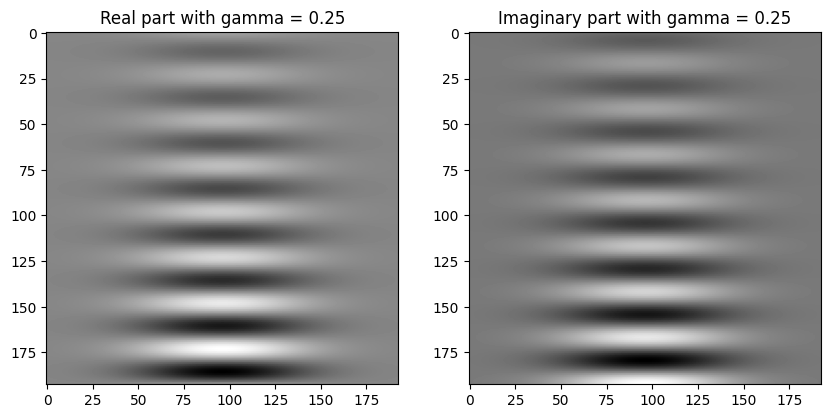

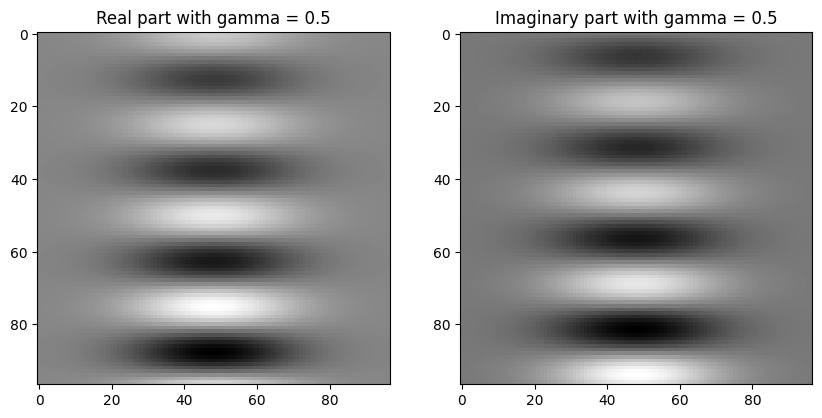

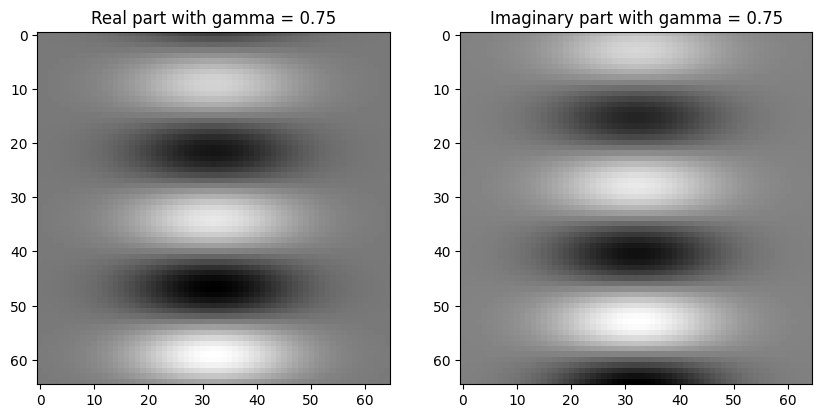

In [52]:
# YOUR CODE HERE
lambda_ = 25
thetas = np.pi / 3
psi = np.pi / 6
sigma = 8
gammas = [0.25, 0.50, 0.75]

for gamma in gammas: 
    gabor_filter = create_gabor(sigma, theta, lambda_, psi, gamma)
    real = gabor_filter[:, :, 0]
    imaginary = gabor_filter[:, :, 1]

    fig, ax = plt.subplots(1, 2, figsize=(10, 5))

    # Plot the real part
    ax[0].title.set_text('Real part with gamma = ' + str(gamma))
    ax[0].imshow(real, cmap='gray')
    
    # Plot the imaginary part
    ax[1].title.set_text('Imaginary part with gamma = ' + str(gamma))
    ax[1].imshow(imaginary, cmap='gray')
    
    plt.show()

<a id="question-13"></a>
#### <font color='#FF0000'>Question 13 (6 points)</font>

Based on the visualizations of parameters and your self-study on Gabor filters, explain briefly:

1. What do the parameters $\lambda$, $\theta$, $\psi$, $\sigma$, and $\gamma$ control?
2. How do these parameters visually influence the Gabor filter kernel?

##### <font color='yellow'>Answer:</font>

>*Write your answer here.*

<a id="section-4"></a>
### **Section 4: Noise in digital images**

Digital images are often plagued by various types of noise that can significantly degrade their quality. These imperfections might originate during the image acquisition process, where sensors introduce noise, or through user errors, such as incorrect camera settings. For example, some medical imaging modalities generate low-resolution images (e.g., 128x128 pixels) that are particularly susceptible to noise. Given the exponential increase in the number of photos taken daily, enhancing noisy or corrupted images has become a critical area of research in image processing.

Noise in digital images can manifest in several ways, two of the most common being salt-and-pepper noise and additive Gaussian noise.

**Salt-and-Pepper Noise:** This type of noise is characterized by random occurrences of black and white pixels scattered across the image. It can result from overexposure, which creates "hot" pixels, or from defective sensors, leading to "dead" pixels. These randomly placed black and white pixels resemble the appearance of salt and pepper sprinkled on the image, hence the name.

**Additive Gaussian Noise:** Another prevalent type of noise is additive Gaussian noise, often associated with thermal effects in the camera sensor. This noise is modeled by adding a random value to each pixel in the image. The random value, denoted by $\epsilon$, is drawn from a Gaussian distribution with a mean of 0 and a standard deviation, $\sigma$, which represents the noise level. The relationship between the original image $\mathbf{I}(x)$ and the noisy image $\mathbf{I}^{\prime}(x)$ can be described by the following equation:

$\mathbf{I}^{\prime}(x) = \mathbf{I}(x) + \epsilon \quad \text{where} \quad \epsilon \sim \mathcal{N}(0, \sigma^2)$ *(Equation D)*

In this scenario, $\mathbf{I}(x)$ represents the original image, and $\mathbf{I}^{\prime}(x)$ is the resulting image after Gaussian noise has been added. The noise $\epsilon$ is sampled independently for each pixel from the Gaussian distribution $\mathcal{N}(0, \sigma^2)$, where $\sigma$ controls the intensity of the noise. As $\sigma$ increases, the image becomes progressively noisier.

Both salt-and-pepper noise and additive Gaussian noise are common in real-world imaging scenarios and require effective noise reduction techniques. In the upcoming sections, we will explore various methods for mitigating these types of noise, enhancing the quality of digital images, and ensuring that the final images are closer to their true representations.

<a id="question-14"></a>
#### <font color='#FF0000'>Question 14 (2 points)</font>

The Peak Signal-to-Noise Ratio (PSNR) is a commonly used metric for quantitatively evaluating the performance of image enhancement algorithms. It is derived from the Mean Squared Error (MSE), which measures the average squared difference between the original image and the enhanced (or approximated) image. The MSE is defined as:

$MSE = \frac{1}{m \cdot n} \sum_{x,y}\left[\mathbf{I}(x,y) - \mathbf{\hat{I}}(x,y)\right]^2$ *(Equation E)*

where $\mathbf{I}$ is the original image of size $m \times n$, and $\mathbf{\hat{I}}$ is the enhanced or approximated version of the image.

The PSNR is then calculated using the MSE, and it quantifies how close the enhanced image is to the original image. The PSNR is defined as:

$PSNR = 10 \cdot \log_{10} \left(\frac{\mathbf{I}_{max}^2}{MSE}\right) \\
= 20 \cdot \log_{10} \left(\frac{\mathbf{I}_{max}}{\sqrt{MSE}}\right) \\
= 20 \cdot \log_{10} \left(\frac{\mathbf{I}_{max}}{RMSE}\right)$

where $\mathbf{I}_{max}$ is the maximum possible pixel value of the image (e.g., 255 for an 8-bit image), and $RMSE$ is the root of the MSE.

Given this understanding, answer the following:

When comparing different methods using the PSNR metric, is a higher value better, or is the opposite true? Explain your answer briefly.

##### <font color='yellow'>Answer:</font>

>*Write your answer here.*

<a id="question-15"></a>
#### <font color='#FF0000'>Question 15 (4 points)</font>

Implement the function `calculate_psnr()` to calculate the Peak Signal-to-Noise Ratio (PSNR) for both grayscale and RGB images. The function should take two images as input: the original image and its enhanced (or approximated) version.

When implementing `calculate_psnr()`, ensure that it works correctly for both grayscale and RGB images. For RGB images, consider how the PSNR formula should be adjusted. Specifically, think about whether to compute the PSNR for each channel separately and then combine the results, or handle the RGB image differently.

**Note:** You are not allowed to use any Python built-in functions from the *PIL* or *Skimage* libraries or any other libraries except for *NumPy*.

In [16]:
def calculate_psnr(orig_image, approx_image):
    '''
    Computes the PSNR (Peak Signal-to-Noise Ratio) between an original image and its enhanced version.

    Args:
        orig_image: The original image (can be grayscale or RGB).
        approx_image: The enhanced or approximated version of the original image.

    Returns:
        psnr_value: The PSNR value in decibels (dB).
    '''

    # YOUR CODE HERE

    return psnr_value

<a id="question-16"></a>
#### <font color='#FF0000'>Question 16 (1 point)</font>

Using your implemented function `calculate_psnr()`, compute and print the PSNR between `frans_bauer.png` and `frans_bauer_salt_pepper.png`.

**Hint:** Ensure that the data type of the images is `float32` before computation.

In [17]:
# YOUR CODE HERE

<a id="question-17"></a>
#### <font color='#FF0000'>Question 17 (1 point)</font>

Using your implemented function `calculate_psnr()`, compute and print the PSNR between `frans_bauer.png` and `frans_bauer_gaussian.png`.

**Hint:** Ensure that the data type of the images is `float32` before computation.

In [18]:
# YOUR CODE HERE

<a id="question-18"></a>
#### <font color='#FF0000'>Question 18 (3 points)</font>

Design a function called `denoise_image()` to remove two types of noise: salt-and-pepper noise and Gaussian noise. The function should denoise the image by applying one of the following methods: box filtering using **cv2.blur** function, median filtering using **cv2.medianBlur** function, or Gaussian filtering using **cv2.GaussianBlur** function.

In [19]:
def denoise_image(input_image, kernel_type, kernel_size=3, sigma=1):
    '''
    Function denoises the image using the specified kernel type:
    - 'box': by using a box filter
    - 'median': by using a median filter
    - 'gaussian': by using a gaussian filter
    
    Args:
        input_image: The input image to be denoised.
        kernel_type: A string specifying the type of filter ('box', 'median', or 'gaussian').
        kernel_size: Size of the kernel to be used for filtering (default is 3).
        sigma: Standard deviation for the Gaussian kernel (used only for the gaussian filter).

    Returns:
        denoised_image: The denoised image.
    '''

    if kernel_type == 'box':

        # YOUR CODE HERE

    elif kernel_type == 'median':

        # YOUR CODE HERE

    elif kernel_type == 'gaussian':

        # YOUR CODE HERE

    else:
        raise ValueError('Kernel type not implemented. Choose between "box", "median", or "gaussian".')

    return denoised_image

IndentationError: expected an indented block after 'if' statement on line 18 (3193229842.py, line 22)

<a id="question-19"></a>
#### <font color='#FF0000'>Question 19 (2 points)</font>

Using your implemented function **denoise_image()**, denoise the `frans_bauer_salt_pepper.png` and `frans_bauer_gaussian.png` images by applying box filtering with kernel sizes of 3x3, 5x5, and 7x7. Display the resulting denoised images.

In [20]:
# YOUR CODE HERE

<a id="question-20"></a>
#### <font color='#FF0000'>Question 20 (2 points)</font>

Using your implemented function **denoise_image()**, denoise the `frans_bauer_salt_pepper.png` and `frans_bauer_gaussian.png` images by applying median filtering with kernel sizes of 3x3, 5x5, and 7x7. Display the resulting denoised images.

In [21]:
# YOUR CODE HERE

<a id="question-21"></a>
#### <font color='#FF0000'>Question 21 (3 points)</font>

Using your implemented function **my_psnr()**, compute the PSNR for each of the 12 denoised images (from Questions 19 and 20) with respect to the original `frans_bauer.png` image. Present your results in a clear and readable format **and** discuss the effect of the filter size on the PSNR. 

**Hint:** Ensure that the images are loaded as `float32` before computation.

In [22]:
# YOUR CODE HERE

##### <font color='yellow'>Answer:</font>

>*Write your answer here.*

<a id="question-22"></a>
#### <font color='#FF0000'>Question 22 (2 points)</font>

Which filter is more effective for removing salt-and-pepper noise, box or median filters? Explain your reasoning. Also, consider which filter performs better for Gaussian noise and why.

##### <font color='yellow'>Answer:</font>

>*Write your answer here.*

<a id="question-23"></a>
#### <font color='#FF0000'>Question 23 (2 points)</font>

Using your implemented function **denoise_image()**, denoise the `frans_bauer_gaussian.png` image by applying Gaussian filtering with kernel sizes of 3x3, 5x5, and 7x7, and standard deviations of 0.5, 1, 3, and 7.

Display the resulting denoised images.

In [23]:
# YOUR CODE HERE

<a id="question-24"></a>
#### <font color='#FF0000'>Question 24 (3 points)</font>

Present your results for the PSNR scores of the 12 images from Question 22 in a clear and readable format **and** discuss the effect of the standard deviation on the PSNR.

In [24]:
# YOUR CODE HERE

##### <font color='yellow'>Answer:</font>

> *Write your answer here.*

<a id="question-25"></a>
#### <font color='#FF0000'>Question 25 (2 points)</font>

What is the difference among median filtering, box filtering, and Gaussian filtering? Briefly explain how they are different at a conceptual level. If two filtering methods give similar PSNR values, can you see a qualitative difference?

##### <font color='yellow'>Answer:</font>

> *Write your answer here.*

<a id="section-5"></a>
### **Section 5: Edge Detection**

Edges in digital images represent areas where there is a significant change in brightness, often corresponding to the boundaries of objects. Detecting these edges is a crucial task in many computer vision applications, such as autonomous driving, where edge detection can be used to identify road boundaries and determine the vehicle's trajectory.

In this section, we will explore various techniques for edge detection, focusing specifically on filters that extract the gradient of the image. The gradient represents the rate of change in brightness and is calculated using first-order derivative filters. The Sobel operator, one of the most common methods, approximates the first derivative of a Gaussian filter and is used to detect edges by highlighting the intensity gradients in an image.

The Sobel operator uses two 3x3 convolution kernels, one for detecting changes in the horizontal direction (G_x) and the other for the vertical direction (G_y). The kernels are defined as follows:

$G_x = \begin{bmatrix} +1 & 0 & -1 \\ +2 & 0 & -2 \\ +1 & 0 & -1 \end{bmatrix} * \mathbf{I}$

$G_y = \begin{bmatrix} +1 & +2 & +1 \\ 0 & 0 & 0 \\ -1 & -2 & -1 \end{bmatrix} * \mathbf{I}$

The gradient magnitude, which combines the horizontal and vertical gradients, is given by:

$G =\sqrt {{G_x}^2+{G_y}^2}$

The direction of the gradient, indicating the orientation of the edge, is calculated as:

$\theta= \tan^{-1}\left(\frac{G_y}{G_x}\right)$

These calculations allow us to detect and quantify edges in an image. In this section, we will apply these methods to extract edges from images, with a particular focus on detecting roads in still images, which is a critical task in autonomous driving systems.

<a id="question-26"></a>
#### <font color='#FF0000'>Question 26 (4 points)</font>

Implement the function **compute_image_gradient()** to compute the gradients of an image. This function should calculate the gradients in both the x and y directions, as well as the gradient magnitude and direction.

You are not allowed to use Python built-in functions for computing gradients, but you may use the `scipy.signal.convolve2d` function for performing 2D convolution.

Additionally, complete the helper function **normalize_image()** to normalize the gradients.

In [53]:
def normalize_image(image: np.ndarray, low=0, high=1) -> np.ndarray:
    '''
    Normalizes the input image to a specified range [low, high].

    Args:
        image: The input image as a numpy array.
        low: The lower bound of the normalization range (default is 0).
        high: The upper bound of the normalization range (default is 1).

    Returns:
        normalized_image: The normalized image as a numpy array.
    '''

    # Convert the image to float32 for precision during normalization
    image = image.astype(np.float32)
    
    # YOUR CODE HERE
    normalized_image = low + (image - np.min(image)) * (high - low) / (np.max(image) - np.min(image))
    
    print('Minimum pixel value:', np.min(normalized_image))
    print('Maximum pixel value:', np.max(normalized_image))
    
    return normalized_image

In [64]:
def compute_image_gradient(input_image: np.ndarray):
    '''
    Computes the gradients of the input image in both x and y directions,
    along with the gradient magnitude and direction.

    Args:
        input_image: The input image as a 2D numpy array.

    Returns:
        gradient_x: The gradient of the image in the x direction.
        gradient_y: The gradient of the image in the y direction.
        gradient_magnitude: The magnitude of the gradient.
        gradient_direction: The direction of the gradient (in degrees).
    '''

    # Sobel kernels for x and y directions
    sobel_x = [[1, 0, -1],
               [2, 0, -2],
               [1, 0, -1]]

    sobel_y = [[1, 2, 1],
               [0, 0, 0],
               [-1, -2, -1]]

    # YOUR CODE HERE
    gradient_x = scipy.signal.convolve2d(input_image, sobel_x)
    normalize_image(gradient_x)
    
    gradient_y = scipy.signal.convolve2d(input_image, sobel_y)
    normalize_image(gradient_y)
    
    gradient_magnitude = np.sqrt(gradient_x ** 2 + gradient_y ** 2)
    gradient_direction = np.arctan(gradient_y / (gradient_x + 1e-6))

    return gradient_x, gradient_y, gradient_magnitude, gradient_direction

<a id="question-27"></a>
#### <font color='#FF0000'>Question 27 (3 points)</font>

Using your implemented function **compute_image_gradient()** on `landscape.jpg`, display the following figures:

1. The gradient of the image in the x-direction.
2. The gradient of the image in the y-direction.
3. The gradient magnitude of each pixel.
4. The gradient direction of each pixel.

Discuss what kind of information each image conveys.

Minimum pixel value: 0.0
Maximum pixel value: 1.0
Minimum pixel value: 0.0
Maximum pixel value: 1.0


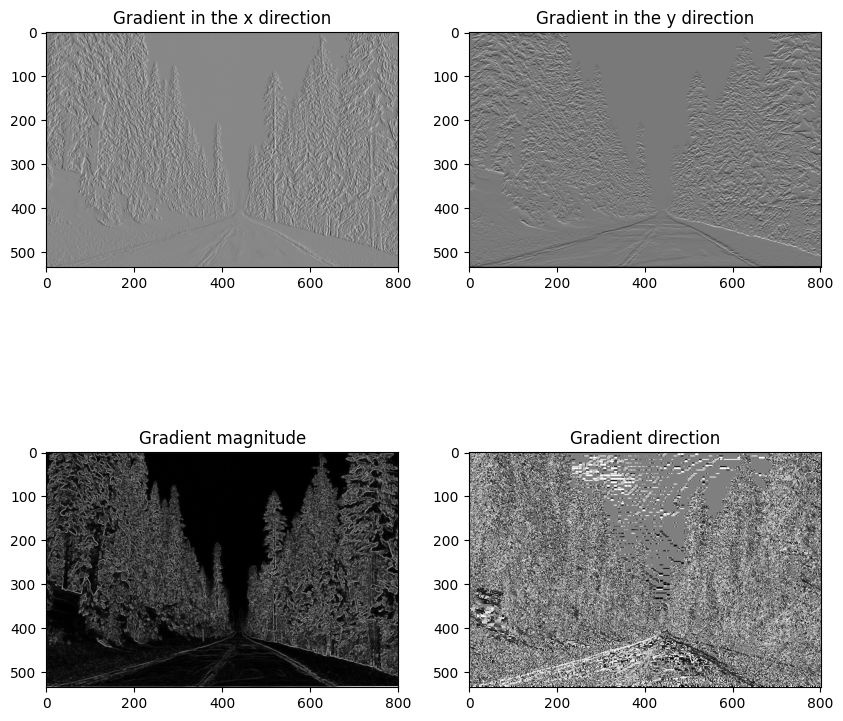

In [65]:
# YOUR CODE HERE
image = cv2.imread('images/landscape.jpg')
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
gradient_x, gradient_y, gradient_magnitude, gradient_direction = compute_image_gradient(image_gray)

fig, ax = plt.subplots(2, 2, figsize=(10, 10))
ax[0, 0].title.set_text('Gradient in the x direction')
ax[0, 0].imshow(gradient_x, cmap='gray')
ax[0, 1].title.set_text('Gradient in the y direction')
ax[0, 1].imshow(gradient_y, cmap='gray')
ax[1, 0].title.set_text('Gradient magnitude')
ax[1, 0].imshow(gradient_magnitude, cmap='gray')
ax[1, 1].title.set_text('Gradient direction')
ax[1, 1].imshow(gradient_direction, cmap='gray')

plt.show()

##### <font color='yellow'>Answer:</font>

> *Write your answer here.*

<a id="question-28"></a>
#### <font color='#FF0000'>Question 28 (4 points)</font>

Compared to the Sobel filter, a Laplacian of Gaussian (LoG) relies on the second derivative of a Gaussian filter. Hence, it will focus on large gradients in the image.

Implement the function **compute_laplacian_of_gaussian()** to compute the Laplacian of Gaussian (LoG) for an image using each the following methods:

1. Smoothing the image with a Gaussian kernel, then applying the Laplacian (second derivative) to the smoothed image.
2. Convolving the image directly with a LoG kernel.
3. Computing the Difference of Gaussians (DoG) at different scales $\sigma_1$ and $\sigma_2$.

The function should take arguments *method*, *kernel_size*, *sigma*, *sigma_1*, and *sigma_2* to specify the parameters for each method.

**Note:** You are not allowed to use Python built-in functions for computing LoG kernels, but you can use `scipy.signal.convolve2d` for 2D convolution.

In [66]:
def compute_laplacian_of_gaussian(image, method, kernel_size=5, sigma=0.5, sigma_1=0.5, sigma_2=1.0):
    '''
    Computes the Laplacian of Gaussian (LoG) using the specified method.

    Args:
        image: Input image as a 2D numpy array.
        method: Specifies which method to use (1, 2, or 3).
        kernel_size: Size of the Gaussian kernel (default is 5).
        sigma: Standard deviation of the Gaussian for methods 1 and 2 (default is 0.5).
        sigma_1: Standard deviation of the first Gaussian for method 3 (default is 0.5).
        sigma_2: Standard deviation of the second Gaussian for method 3 (default is 1.0).

    Returns:
        log_image: The resulting image after applying the Laplacian of Gaussian.
    '''

    # Define the Laplacian kernel for the second derivative
    laplacian_kernel = np.array([[0, -1, 0],
                                 [-1, 4, -1],
                                 [0, -1, 0]])

    if method == 1:
        # Method 1: Gaussian smoothing followed by the Laplacian
        
        # YOUR CODE HERE
        gaussian_kernel = gaussian_kernel_2D(sigma, sigma, kernel_size)
        blurred_image = scipy.signal.convolve2d(image, gaussian_kernel)
        log_image = scipy.signal.convolve2d(blurred_image, laplacian_kernel)

    elif method == 2:
        # Method 2: Direct convolution with a LoG kernel
    
        # YOUR CODE HERE
        log_image = scipy.signal.convolve2d(image, laplacian_kernel)

    elif method == 3:
        # Method 3: Difference of Gaussians (DoG)

        # YOUR CODE HERE
        gaussian_1 = gaussian_kernel_2D(sigma_1, sigma_1, kernel_size)
        gaussian_2 = gaussian_kernel_2D(sigma_2, sigma_2, kernel_size)
        
        blurred_image_1 = scipy.signal.convolve2d(image, gaussian_1)
        blurred_image_2 = scipy.signal.convolve2d(image, gaussian_2)
        
        log_image = blurred_image_1 - blurred_image_2

    else:
        raise ValueError("Invalid method. Choose 1, 2, or 3.")

    return log_image

<a id="question-29"></a>
#### <font color='#FF0000'>Question 29 (1 point)</font>

Test your **compute_laplacian_of_gaussian()** function using `landscape.jpg` and visualize your results using the three methods. Use the default parameters provided for each method.

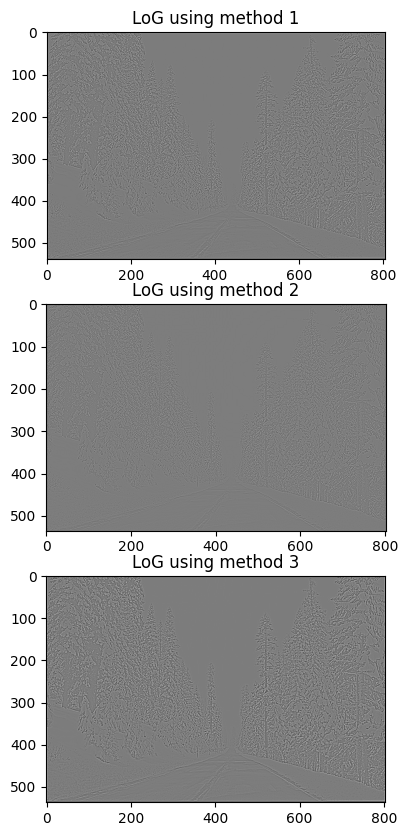

In [67]:
# YOUR CODE HERE
image = cv2.imread('images/landscape.jpg')
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
log_image1 = compute_laplacian_of_gaussian(image_gray, 1)
log_image2 = compute_laplacian_of_gaussian(image_gray, 2)
log_image3 = compute_laplacian_of_gaussian(image_gray, 3)

fig, ax = plt.subplots(3, 1, figsize=(10, 10))
ax[0].title.set_text('LoG using method 1')
ax[0].imshow(log_image1, cmap='gray')
ax[1].title.set_text('LoG using method 2')
ax[1].imshow(log_image2, cmap='gray')
ax[2].title.set_text('LoG using method 3')
ax[2].imshow(log_image3, cmap='gray')

plt.show()

<a id="question-30"></a>
#### <font color='#FF0000'>Question 30 (2 points)</font>

Discuss the differences between applying the three methods of the Laplacian of Gaussian (LoG) on `landscape.jpg`. Consider how each method approaches edge detection and the visual results produced by each technique.

##### <font color='yellow'>Answer:</font>

> *Write your answer here.*

<a id="question-31"></a>
#### <font color='#FF0000'>Question 31 (2 points)</font>

In the first method, why is it important to convolve an image with a Gaussian before convolving with a Laplacian?

##### <font color='yellow'>Answer:</font>

> *Write your answer here.*

<a id="question-32"></a>
#### <font color='#FF0000'>Question 32 (2 points)</font>

In the third method, what is the best ratio between $\sigma_1$ and $\sigma_2$ to achieve the best approximation of the LoG? What is the purpose of having two different standard deviations?

**Hint**: The best approximation for our case is found when both $\sigma_1$ and $\sigma_2$ are within the range of 1 to 10.

In [30]:
# YOUR CODE HERE
image = cv2.imread('images/landscape.jpg')
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

sigma_1 = 5 
ratios = [0.2, 0.6, 1, 1.5, 2]

for ratio in ratios: 
    sigma_2 = sigma_1 * ratio
    log_image = compute_laplacian_of_gaussian(image_gray, 3, sigma_1=sigma_1, sigma_2=sigma_2)
    
    plt.title('LoG 3 with sigma_1 = ' + str(sigma_1) + ' and sigma_2 = ' + str(sigma_2) + ', having ratio = ' + str(ratio))
    plt.imshow(log_image, cmap='gray')
    plt.show()


##### <font color='yellow'>Answer:</font>

> *Write your answer here.*

<a id="question-33"></a>
#### <font color='#FF0000'>Question 33 (2 points)</font>

What else is needed to improve the performance and isolate the road? You don't have to provide any specific parameter or algorithm. Propose a direction that would be interesting to explore and explain how you would approach it.

##### <font color='yellow'>Answer:</font>

> *Write your answer here.*

<a id="section-6"></a>
### **Section 6: Foreground-background separation**

Foreground-background separation is a crucial task in the field of computer vision, enabling applications such as object recognition, scene understanding, and image editing. The objective is to distinguish the main object (foreground) from the surrounding area (background) in an image. This process is essential when the foreground object needs to be isolated for further analysis or processing.

In this section, we will implement a simple unsupervised algorithm that leverages texture variations to segment the foreground object from the background. The assumption is that the foreground object has a distinct combination of textures compared to the background, which can be exploited for separation.

Gabor filters, known for their effectiveness in capturing texture information due to their frequency domain characteristics, will be used to analyze the texture differences within the image. By applying a collection of Gabor filters with varying scales and orientations—referred to as a *filter bank*—we can effectively distinguish between different texture patterns in the image.

In the example below, you can see how this process works. The **left** image shows the original input image. The **middle** image displays the foreground mask, which identifies the pixels that belong to the foreground object. The **right** image shows the result of applying the foreground mask to the input image, effectively isolating the foreground object from the background.

<img src="https://drive.google.com/thumbnail?id=1N4hExtMIiMxM03OK4iHKURTvSibccEwd&sz=w1000">

See the outline of the algorithm below:

---

**Foreground-Background Segmentation Algorithm**

---

**Input:** $x$ - input image

**Output:** $y$ - pixelwise labels

1.   Convert to grayscale if necessary.

>**if** $x$ is RGB **then**

>>$x$ $\leftarrow$ rgb2gray($x$)

>**end if**

2.   Create Gabor filterbank, $\mathcal{F}_{gabor}$, with varying $\sigma$, $\lambda$ and $\theta$.

3.   Filter $x$ with the filterbank. Store each output in $fmaps$.

4.   Compute the magnitude of the complex $fmaps$. Store the results in $fmags$.

>$fmags$ $\leftarrow$  $\vert fmaps \vert$

5.   Smooth $fmags$.

>$fmags$ $\leftarrow$  smooth($fmags$)

6.   Convert $fmags$ into data matrix, $f$.

>$f$ $\leftarrow$  reshape($fmags$)

7.   Cluster $f$ using kmeans into two sets.

>$y$ $\leftarrow$  kmeans($f$, 2)

---

<a id="question-33"></a>
#### <font color='#FF0000'>Question 33 (7 points)</font>

Please get familiar with the provided skeleton code below. You will need your implementation of the **create_gabor()** function. When you successfully implement all functions, the code should run without problems and produce a reasonable segmentation with the default parameters on **kobi.png**.

In [31]:
def load_image(image_id="kobi"):
    '''
    Load an image, resize it, and set the correct color representation.

    Args:
        image_id: ID of the image (default is "kobi")

    Returns:
        image: Loaded and processed image
    '''
    if image_id == 'clownfish':
        image = cv2.imread('./images/clownfish.jpg')
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    elif image_id == 'flower':
        image = cv2.imread('./images/flower.jpg')
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    elif image_id == 'kobi':
        image = cv2.imread('./images/kobi.png')
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    elif image_id == 'landscape':
        image = cv2.imread('./images/landscape.jpg')
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    elif image_id == 'polar_bear_hiding':
        image = cv2.imread('./images/polar_bear_hiding.jpg')
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    elif image_id == 'robin':
        image = cv2.imread('./images/robin.jpg')
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    elif image_id == 'swan':
        image = cv2.imread('./images/swan.jpg')
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    else:
        raise ValueError('Image not available.')

    return image

In [32]:
def show_image(image, title="Kobi", colormap='gray'):
    '''
    Display an image in grayscale.

    Args:
        image: Image to be displayed
        title: Title for the image (default is "Kobi")
        colormap: Colormap used by matplotlib (default is 'gray')
    '''
    plt.figure()
    plt.title(title)
    plt.imshow(image, cmap=colormap)
    plt.axis("off")

In [33]:
### Foreground-Background Segmentation Algorithm
### Part 0 - Read Image and Convert to Grayscale

def preprocess_image(image_id="kobi"):
    '''
    Load an image, resize it, and convert it to grayscale if necessary.

    Args:
        image_id: ID of the image to load (default is "Kobi")

    Returns:
        grayscale_image: Grayscale image
    '''
    # Load the image
    image = load_image(image_id)
    show_image(image)

    # Check if the image is grayscale or RGB
    # YOUR CODE HERE
    
    return grayscale_image

In [34]:
grayscale_image = preprocess_image(image_id="kobi")

In [35]:
def create_gabor_filter_bank(image):
    '''
    Create a Gabor filter bank with varying scales and orientations.

    Args:
        image: Grayscale input image

    Returns:
        gabor_filter_bank: A list of dictionaries containing Gabor filters and their parameters
    '''
    num_rows, num_cols = image.shape

    # Estimate the minimum and maximum wavelengths for the sinusoidal carriers
    lambda_min = 4 / np.sqrt(2)
    lambda_max = np.sqrt(np.abs(num_rows) ** 2 + np.abs(num_cols) ** 2)

    # Specify the carrier wavelengths
    n = np.floor(np.log2(lambda_max / lambda_min))
    lambdas = 2 ** np.arange(0, (n - 2) + 1) * lambda_min

    # Define the set of orientations for the Gaussian envelope (Thetas)
    delta_theta = np.pi / 4.0
    orientations = np.arange(0, np.pi + delta_theta, delta_theta)

    # Define the set of sigmas for the Gaussian envelope (spread of the Gaussian)
    sigmas = np.array([1, 2])

    gabor_filter_bank = []
    start_time = time.time()

    # Total number of features
    n_features = len(lambdas) * len(sigmas) * len(orientations)

    with tqdm(total=n_features) as pbar:

        # Generate Gabor filters for each combination of wavelength, sigma, and orientation
        for wavelength in lambdas:
            for sigma in sigmas:
                for theta in orientations:
                    # Filter parameter configuration
                    psi = 0
                    gamma = 0.5

                    # Create a Gabor filter with the specified parameters
                    filter_config = {}
                    filter_config["filter_pairs"] = create_gabor(sigma, theta, wavelength, psi, gamma)
                    filter_config["sigma"] = sigma
                    filter_config["wavelength"] = wavelength
                    filter_config["theta"] = theta
                    filter_config["psi"] = psi
                    filter_config["gamma"] = gamma

                    # Append the filter configuration to the filter bank
                    gabor_filter_bank.append(filter_config)

                    # Update the progress bar
                    pbar.update(1)

    creation_time = time.time() - start_time
    
    # Print details about the created filter bank
    print(f'Total number of filters: {len(gabor_filter_bank)}')
    print(f'Number of scales (sigma): {len(sigmas)}')
    print(f'Number of orientations (theta): {len(orientations)}')
    print(f'Number of carriers (lambda): {len(lambdas)}')
    print(f'\nFilter bank created in {creation_time} seconds.')

    return gabor_filter_bank

In [36]:
gabor_filter_bank = create_gabor_filter_bank(grayscale_image)

In [37]:
### Foreground-Background segmentation algoritm
### Part 2 - gabor features fMaps and fMags

def extract_gabor_features(image, gabor_filter_bank, visualize=False):
    '''
    Filter images using the Gabor filter bank with quadrature pairs (real and imaginary parts).

    Args:
        image: Grayscale input image
        gabor_filter_bank: A list of dictionaries containing Gabor filters and their parameters
        visualize: Flag to visualize filter responses (default is False)

    Returns:
        feature_magnitudes: List of magnitude responses for each Gabor filter
    '''
    feature_maps = []

    with tqdm(total=len(gabor_filter_bank)) as pbar:

        for gabor_filter in gabor_filter_bank:
            # Filter the image with the real and imaginary parts of the Gabor filter

            real_output = None
            imaginary_output = None

            # YOUR CODE HERE

            # Append the real and imaginary parts to the list of feature maps
            feature_maps.append(np.stack((real_output, imaginary_output), 2))

            # Update the progress bar
            pbar.update(1)

            # Visualize the filter responses if requested
            if visualize:
                fig = plt.figure()
                ax = fig.add_subplot(1, 2, 1)
                ax.imshow(real_output, cmap='gray')
                ax.set_title(f'Real Part, λ={gabor_filter["wavelength"]:.4f}, θ={gabor_filter["theta"]:.4f}, σ={gabor_filter["sigma"]:.4f}')
                ax.axis("off")

                ax = fig.add_subplot(1, 2, 2)
                ax.imshow(imaginary_output, cmap='gray')
                ax.set_title(f'Imaginary Part, λ={gabor_filter["wavelength"]:.4f}, θ={gabor_filter["theta"]:.4f}, σ={gabor_filter["sigma"]:.4f}')
                ax.axis("off")
                plt.show()

    # Compute the magnitude of the output responses
    feature_magnitudes = []

    with tqdm(total=len(feature_maps)) as pbar:
    
        for i, feature_map in enumerate(feature_maps):

            # Compute the magnitude of the feature map
            # YOUR CODE HERE

            # Update the progress bar
            pbar.update(1)

            # Visualize the magnitude response if requested
            if visualize:
                plt.figure()
                plt.imshow(magnitude.astype(np.uint8), cmap='gray')
                plt.title(f'Magnitude, λ={gabor_filter_bank[i]["wavelength"]:.4f}, θ={gabor_filter_bank[i]["theta"]:.4f}, σ={gabor_filter_bank[i]["sigma"]:.4f}')
                plt.axis("off")
                plt.show()

    print(f'Created {len(feature_magnitudes)} features for each pixel')
    return feature_magnitudes

In [38]:
feature_magnitudes = extract_gabor_features(grayscale_image, gabor_filter_bank)

In [39]:
### Foreground-Background segmentation algoritm
### Part 3 - cluster features in two sets

def cluster_features(image, feature_magnitudes, apply_smoothing=True):
    '''
    Cluster pixels based on their Gabor feature magnitudes.

    Hint: To standardize the features, you can use the following web page: https://www.analyticsvidhya.com/blog/2020/04/feature-scaling-machine-learning-normalization-standardization/

    Args:
        image: Grayscale input image
        feature_magnitudes: List of magnitude responses for each Gabor filter
        apply_smoothing: Flag to apply Gaussian smoothing (default is True)

    Returns:
        pixel_labels: Cluster labels for each pixel
    '''
    num_rows, num_cols = image.shape
    features = np.zeros(shape=(num_rows, num_cols, len(feature_magnitudes)))

    if apply_smoothing:
        # Apply Gaussian smoothing to each feature magnitude
        # YOUR CODE HERE

    else:
        # Directly insert magnitude images into the features matrix
        for i, feature_magnitude in enumerate(feature_magnitudes):
            features[:, :, i] = feature_magnitude

    # Reshape the features matrix to prepare for clustering
    features = np.reshape(features, newshape=(num_rows * num_cols, -1))

    # Standardize the features   
    # YOUR CODE HERE

    start_time = time.time()

    # Apply k-means clustering
    # YOUR CODE HERE

    print(f'Clustering completed in {time.time() - start_time} seconds.')

    return pixel_labels

In [40]:
pixel_labels = cluster_features(grayscale_image, feature_magnitudes, apply_smoothing=True)

In [41]:
### Foreground-Background segmentation algorithm
### Part 4 - Visualise result

def visualize_clustering_results(image, pixel_labels):
    '''
    Visualize the clustering results and segmentation.

    Args:
        image: Grayscale input image
        pixel_labels: Cluster labels for each pixel

    Returns:
        None
    '''
    num_rows, num_cols = image.shape
    pixel_labels = np.reshape(pixel_labels, newshape=(num_rows, num_cols))

    # Visualize pixel clusters
    plt.figure()
    plt.title('Pixel Clusters')
    plt.imshow(pixel_labels)
    plt.axis("off")
    plt.show()

    # Use pixel labels to visualize segmentation
    segmented_image1 = np.zeros_like(image)
    segmented_image2 = np.zeros_like(image)

    # YOUR CODE HERE
    binary_mask = pixel_labels == 0 # Check for the value of your labels in pixel_labels (could be 1 or 2 instead of 0)

    segmented_image1[binary_mask] = image[binary_mask]
    segmented_image2[~binary_mask] = image[~binary_mask]

    plt.figure()
    plt.title('Montage')
    plt.imshow(segmented_image1, cmap='gray', interpolation='none')
    plt.imshow(segmented_image2, cmap='jet', interpolation='none', alpha=0.7)
    plt.axis("off")
    plt.show()

In [42]:
# Visualize the results
visualize_clustering_results(grayscale_image, pixel_labels)

<a id="question-34"></a>
#### <font color='#FF0000'>Question 34 (7 points)</font>

Implement the `foreground_background_separation()` function using Gabor filters. Complete the function provided and experiment with different images (`clownfish`, `flower`, `kobi`, `polar_bear_hiding`, `robin` **and** `swan`) using the default parameters.

Make sure to visualize the results using four subplots: the original image, the pixel representation projected onto the first principal component, the pixel clusters, and the montage showing segmentation. 

After visualizing the results, observe how the `sigmas` and `orientations` parameters influence the foreground-background separation. Describe your observations, focusing on the effectiveness of the separation and any patterns or trends you notice.

In [43]:
def foreground_background_separation(image, sigmas, orientations, apply_smoothing=True):
    '''
    Perform foreground-background segmentation using Gabor filters.

    Args:
        image: Grayscale input image
        sigmas: List of sigmas for the Gaussian envelope
        orientations: List of orientations for the Gabor filters
        apply_smoothing: Flag to apply Gaussian smoothing to magnitude images (default is True)

    Returns:
        None
    '''

    # YOUR CODE HERE

In [44]:
# Control settings
delta_theta = 2 * np.pi / 8  # Step size for orientations
orientations = np.arange(0, np.pi + delta_theta, delta_theta)
sigmas = np.array([1.0, 2.0])
apply_smoothing = True

image_names = [
    "clownfish",
    "flower",
    "kobi",
    "polar_bear_hiding",
    "robin",
    "swan"
]

# Loop through each image, load it, and apply foreground-background separation
for image_name in image_names:
    # Load the image
    image = load_image(image_name)
    
    # Convert the image to grayscale
    image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    
    # Perform foreground-background separation
    foreground_background_separation(image, sigmas, orientations, apply_smoothing)

##### <font color='yellow'>Answer:</font>

> *Write your answer here.*

<a id="question-35"></a>
#### <font color='#FF0000'>Question 35 (4 points)</font>

Experiment with different `sigma` and `theta` settings for the `foreground_background_separation()` function until you achieve reasonable outputs. For each input image, report the parameter settings that work best and provide an explanation for why these settings are effective. 

##### <font color='yellow'>Answer:</font>

> *Write your answer here.*

<a id="question-36"></a>
#### <font color='#FF0000'>Question 36 (4 points)</font>

After achieving decent separation on all test images, run the script again using the corresponding parameters, but this time set `apply_smoothing = False`. 

Describe what you observe in the output when smoothing is not applied to the magnitude images. Explain why these changes occur and discuss the reasoning behind the smoothing step.

In [45]:
# YOUR CODE HERE

##### <font color='yellow'>Answer:</font>

> *Write your answer here.*

<a id="section-x"></a>
### **Section X: Individual Contribution Report *(Mandatory)***

Because we want each student to contribute fairly to the submitted work, we ask you to fill out the textcells below. Write down your contribution to each of the assignment components in percentages. Naturally, percentages for one particular component should add up to 100% (e.g. 30% - 30% - 40%). No further explanation has to be given.

| Name | Contribution on Research | Contribution on Programming | Contribution on Writing |
| -------- | ------- | ------- | ------- |
|  | - % | - % | - % |
|  | - % | - % | - % |
|  | - % | - % | - % |
|  | - % | - % | - % |

### - End of Notebook -